# Modelo: KNN

El siguiente modelo que vamos a entrenar se trata de KNN. Utilizaremos KNeighborsClassifier, distintos scalers y métricas de la libreria sklearn

## Librerias y funciones necesarias

Comenzamos importando todas las librerias y funciones necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [2]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion
from preprocessing import aplicar_preparacion_generalizado
from preprocessing import conversion_numerica_generalizada
from preprocessing import get_dataframe_scaled
from preprocessing import reduccion_rfecv
from preprocessing import get_dataframe_polynomial

## Primer preprocesamiento

En primer lugar obtenemos el dataset para entrenar y el holdout. En segundo lugar, aplicamos una función que trabaja sobre las features, generalizando algunas y dejando de lado otras según lo observado en la primer parte de este trabajo práctico. También separamos a la variable target del resto del dataset. También, convertimos a númericas las variables categoricas para poder entrenar nuestro modelo. Por último, vamos a escalar nuestro dataset con StandarScaler de sklearn

In [3]:
df, df_holdout = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)
X_df = conversion_numerica(X_df) 

Aplicando 'conversion_numerica' en las variables categóricas.


Luego vamos a realizar un split del dataset para dividir en train y test. Como observamos en la primer parte de este trabajo práctico, la variable target no esta distribuida uniformente por lo cual realizamos una división estratificada

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

Finalemte escalamos los datos

In [5]:
scaler = StandardScaler()
X_train = get_dataframe_scaled(X_train,scaler)
X_test = get_dataframe_scaled(X_test,scaler)

### Entrenamiento

Vamos a realizar el entrenamiento de KNN, buscando hiperparámetros adecuados y utilizando K folds. Utilizamos Gridsearch y StratifiedKfold de sklearn. Variaremos la cantidad de vecinos asi como también si se ponderan las distancias o no de los mismos

In [6]:
parametros = {"n_neighbors":np.arange(20,60,5),"weights":["uniform","distance"]}
clf = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, parametros, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  7.4min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f9ae495f5f0>,
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([20, 25, 30, 35, 40, 45, 50, 55]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=4)

Veamos que hiperprámetros resultaron óptimos

In [7]:
clf.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

### Métricas

Evaluamos nuestro modelo en base a las métricas

In [8]:
y_pred = clf.predict(X_test)

AUC-ROC score sobre test:  0.8840654727512847
AUC-ROC score sobre train:  0.8964266014341559
Accuracy sobre test:  0.8413941348073085
Accuracy sobre train:  0.8411010442260443
Los mejores hiperpametros elegidos:  {'n_neighbors': 40, 'weights': 'uniform'}
              precision    recall  f1-score   support

  Bajo valor       0.87      0.93      0.90      4945
  Alto valor       0.72      0.56      0.63      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.76      6513
weighted avg       0.83      0.84      0.83      6513



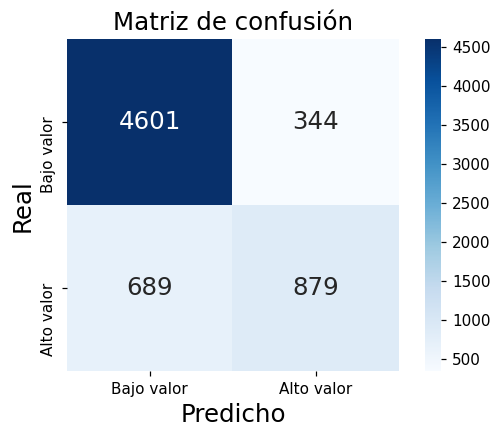

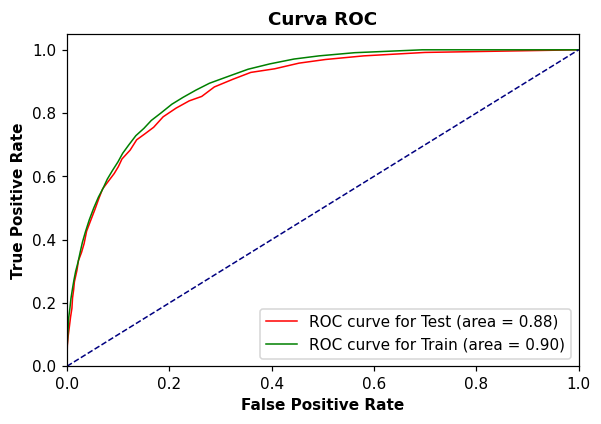

In [9]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Accuracy sobre train: ", "%0.16f"  % accuracy_score(clf.predict(X_train), y_train))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_test, y_pred, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)

Obtuvimos 0.88 de AUC-ROC sobre test. Veamos si on otro preprocesamiento podemos mejorar estos datos

## Segundo preprocesamiento

En primer lugar obtenemos el dataset para entrenar. En segundo lugar, aplicamos una función que trabaja sobre las features, generalizando algunas y dejando de lado otras según lo observado en la primer parte de este trabajo práctico. También separamos a la variable target del resto del dataset. También, convertimos a númericas las variables categoricas para poder entrenar nuestro modelo. Por último, vamos a escalar nuestro dataset con Normalizer de sklearn

In [10]:
df, df_holdout = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)
X_df = conversion_numerica(X_df) 

Aplicando 'conversion_numerica' en las variables categóricas.


Luego vamos a realizar un split del dataset para dividir en train y test. Como observamos en la primer parte de este trabajo práctico, la variable target no esta distribuida uniformente por lo cual realizamos una división estratificada

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

Luego escalamos

In [12]:
scaler = Normalizer()
X_train = get_dataframe_scaled(X_train,scaler)
X_test = get_dataframe_scaled(X_test,scaler)

### Entrenamiento

Vamos a realizar el entrenamiento de KNN, buscando hiperparámetros adecuados y utilizando K folds. Utilizamos Gridsearch y StratifiedKfold de sklearn. Variaremos la cantidad de vecinos asi como también si se ponderan las distancias o no de los mismos

In [13]:
parametros = {"n_neighbors":np.arange(20,60,5),"weights":["uniform","distance"]}
clf_2 = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf_2 = GridSearchCV(clf_2, parametros, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)
clf_2.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f9afa10b890>,
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([20, 25, 30, 35, 40, 45, 50, 55]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=4)

Veamos que hiperprámetros usar

In [14]:
clf_2.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

### Métricas

In [15]:
y_pred = clf_2.predict(X_test)

AUC-ROC score sobre test:  0.8734192185468728
AUC-ROC score sobre train:  0.8930391542184181
Accuracy sobre test:  0.8295716259788116
Accuracy sobre train:  0.8399877149877150
              precision    recall  f1-score   support

  Bajo valor       0.87      0.91      0.89      4945
  Alto valor       0.67      0.58      0.62      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.76      6513
weighted avg       0.82      0.83      0.83      6513



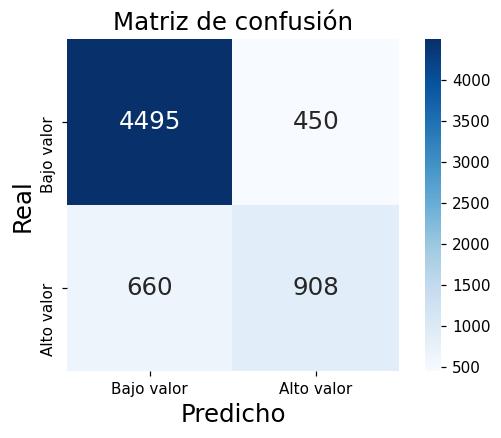

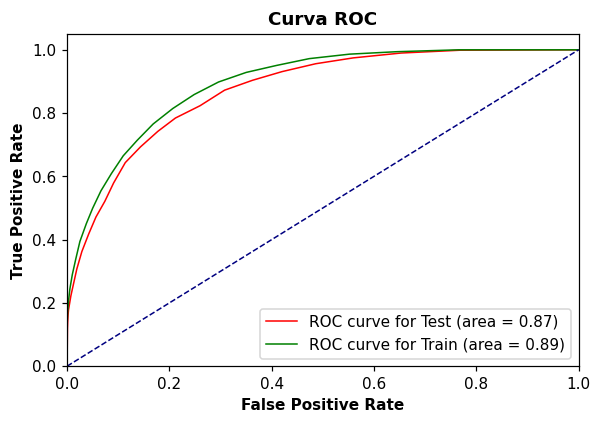

In [16]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf_2.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf_2.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Accuracy sobre train: ", "%0.16f"  % accuracy_score(clf_2.predict(X_train), y_train))
print(classification_report(y_test, y_pred, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf_2, X_test, y_test, X_train, y_train)


Vemos que nuesto score empeoro respecto del preprocesamiento anterior. Sigamos con otro preprocesado más

## Tercer preprocesamiento

En primer lugar obtenemos el dataset para entrenar y el holdout. En segundo lugar, aplicamos una función que trabaja sobre las features, generalizando algunas y dejando de lado otras según lo observado en la primer parte de este trabajo práctico. También separamos a la variable target del resto del dataset. También, convertimos a númericas las variables categoricas para poder entrenar nuestro modelo. Por último, vamos a escalar nuestro dataset con MinMaxScaler de sklearn

In [17]:
df, df_holdout = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)
X_df = conversion_numerica(X_df) 

Aplicando 'conversion_numerica' en las variables categóricas.


Luego vamos a realizar un split del dataset para dividir en train y test. Como observamos en la primer parte de este trabajo práctico, la variable target no esta distribuida uniformente por lo cual realizamos una división estratificada

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

Luego escalamos

In [19]:
scaler = MinMaxScaler()
X_train = get_dataframe_scaled(X_train,scaler)
X_test = get_dataframe_scaled(X_test,scaler)

### Entrenamiento

Vamos a realizar el entrenamiento de KNN, buscando hiperparámetros adecuados y utilizando K folds. Utilizamos Gridsearch y StratifiedKfold de sklearn. Variaremos la cantidad de vecinos asi como también si se ponderan las distancias o no de los mismos

In [20]:
parametros = {"n_neighbors":np.arange(20,60,5),"weights":["uniform","distance"]}
clf_3 = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=5,shuffle= True, random_state= 10).split(X_train, y_train)
clf_3 = GridSearchCV(clf_3, parametros, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)
clf_3.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  4.5min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f9afa043e40>,
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([20, 25, 30, 35, 40, 45, 50, 55]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=4)

Veamos que hiperprámetros usar

In [21]:
clf_3.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

### Métricas

In [22]:
y_pred = clf_3.predict(X_test)

AUC-ROC score sobre test:  0.8832135634840388
AUC-ROC score sobre train:  0.8949696560399827
Accuracy sobre test:  0.8367879625364655
Accuracy sobre train:  0.8388743857493858
              precision    recall  f1-score   support

  Bajo valor       0.87      0.93      0.90      4945
  Alto valor       0.70      0.56      0.62      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.74      0.76      6513
weighted avg       0.83      0.84      0.83      6513



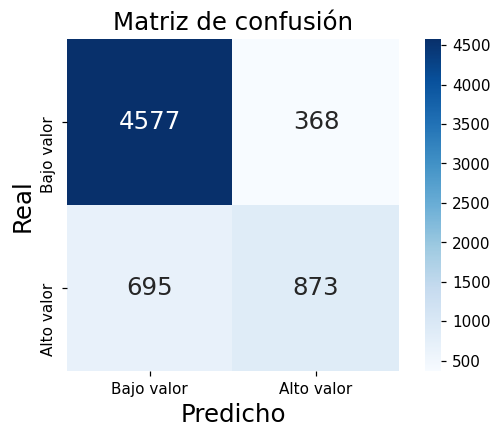

In [ ]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf_3.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf_3.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Accuracy sobre train: ", "%0.16f"  % accuracy_score(clf_3.predict(X_train), y_train))
print(classification_report(y_test, y_pred, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf_3, X_test, y_test, X_train, y_train)


Mejoramos respecto del preprocesado anterior, practicamente obtuvimos algo similar al primer preprocesamiento. Para finalizar, testiemos en los holdouts

## Holdout